In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Load data

store_dat = pd.read_csv('location_rev.csv')

In [4]:
store_dat.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [5]:
store_dat.dtypes

revenue                float64
num_competitors        float64
median_income          float64
num_loyalty_members    float64
population_density     float64
location_age           float64
dtype: object

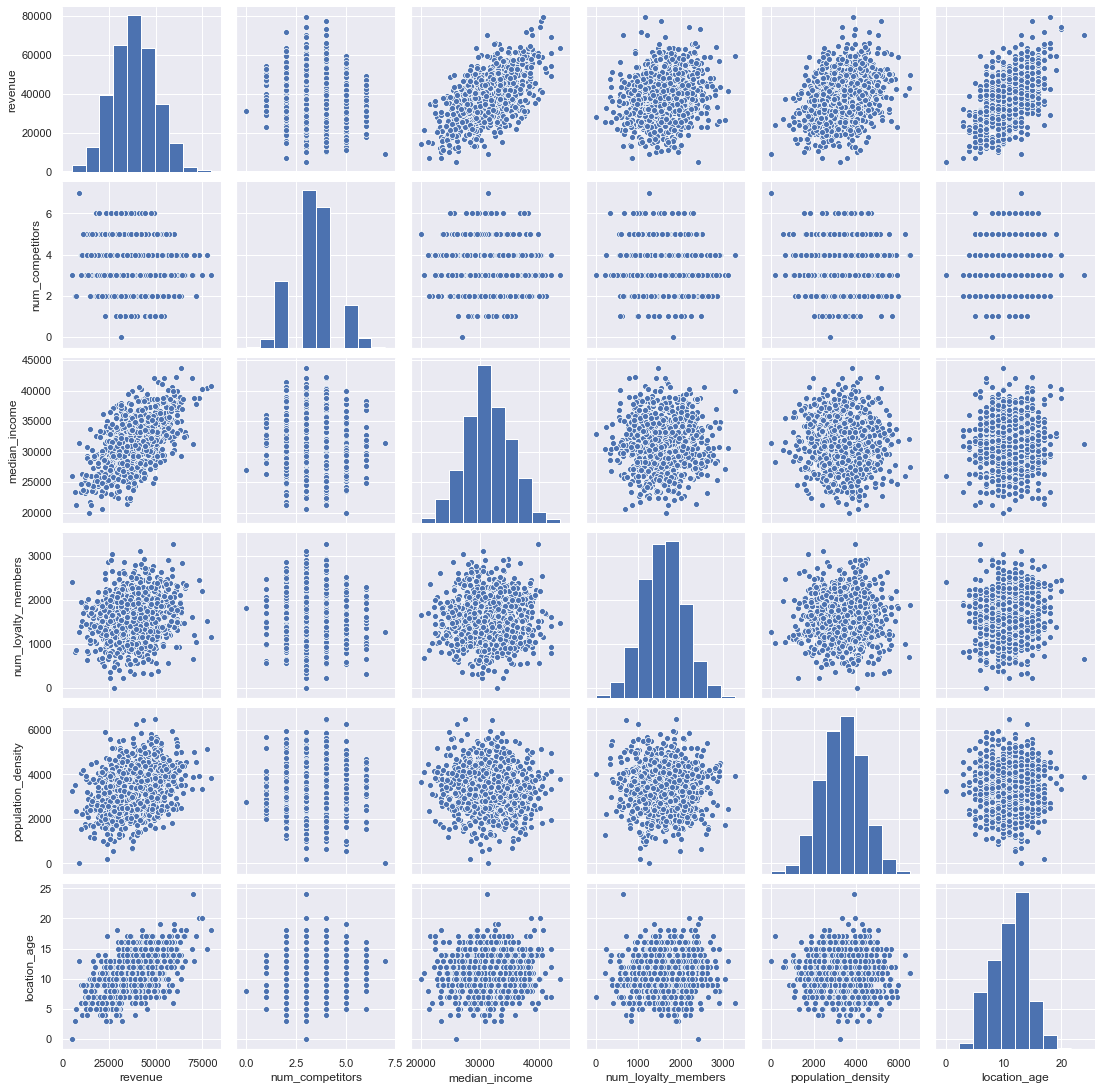

In [6]:
sns.pairplot(store_dat)

In [7]:
store_dat.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


In [8]:
store_dat.columns

Index(['revenue', 'num_competitors', 'median_income', 'num_loyalty_members',
       'population_density', 'location_age'],
      dtype='object')

In [9]:
X = store_dat[['num_competitors', 'median_income', 'num_loyalty_members','population_density', 'location_age']]
y = store_dat['revenue']

In [10]:
# Linear Regression

# Split data

train_x, test_x, train_y, test_y = train_test_split(X,y, random_state = 100)

In [11]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

In [13]:
model.intercept_

-51068.6364423637

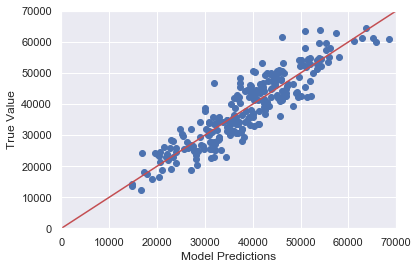

In [20]:
plt.scatter(model.predict(test_x),test_y)
plt.xlim(0,70000)
plt.ylim(0,70000)
plt.plot([0, 70000], [0, 70000], 'k-', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

In [21]:
from scipy.stats.stats import pearsonr
pearsonr(model.predict(test_x),test_y)

(0.9061597827907566, 1.1552714895192324e-94)